# **Stroke Prediction Dataset**

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Dataset Information:**

healthcare-data-stroke-data.csv: The csv contains data related to patients who may have heart disease and various attributes which determine that :

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Objective**

* Visualize the relationships between various Healthy and Unhealthy habits to Heart Strokes, and there by predict the stroke probability with best model and hypertuned parameters.

**Assumptions**

* Smoking can induce Stroke, is it true?
* Heart with a Heart Disease is prone to Stroke, is it true?
* Workload results in high blood pressure and that could lead to Stroke, is it true?
* Males are most susceptible to strokes due to high work related stress, is it true?
 
**Questions to be answered**

* Does age has impact on strokes? and How is this parameter distributed?
* Does body mass index and glucose levels in a person, propel a heart stroke?
* Is there a difference in the rate of heart stroke for smokers and non smokers?
* Does the type of job, whether stressdul or not, contribute to heart stroke?


**So Let's get Started**

**Import necessary packages**

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Common model helpers
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)


# dimensionality reduction
from sklearn.decomposition import PCA
from umap import UMAP
import pylab as pl

# imbalance dataset handling

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)
# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [2]:
#Reading the csv file in variable 

df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
#get the size of dataframe
df.shape

(5110, 12)

**Observation: There are 5110 rows and 12 columns in the dataset.**

In [6]:
df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**Observation:**

* id, hypertension, heart_disease and stroke are of int datatype.
* gender, ever_married, work_type, Residence_type and smoking_status are of object datatype.
* age, avg_glucose_level and bmi are of float datatype.

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observation: Only bmi column has certain missing values.



In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<AxesSubplot:>

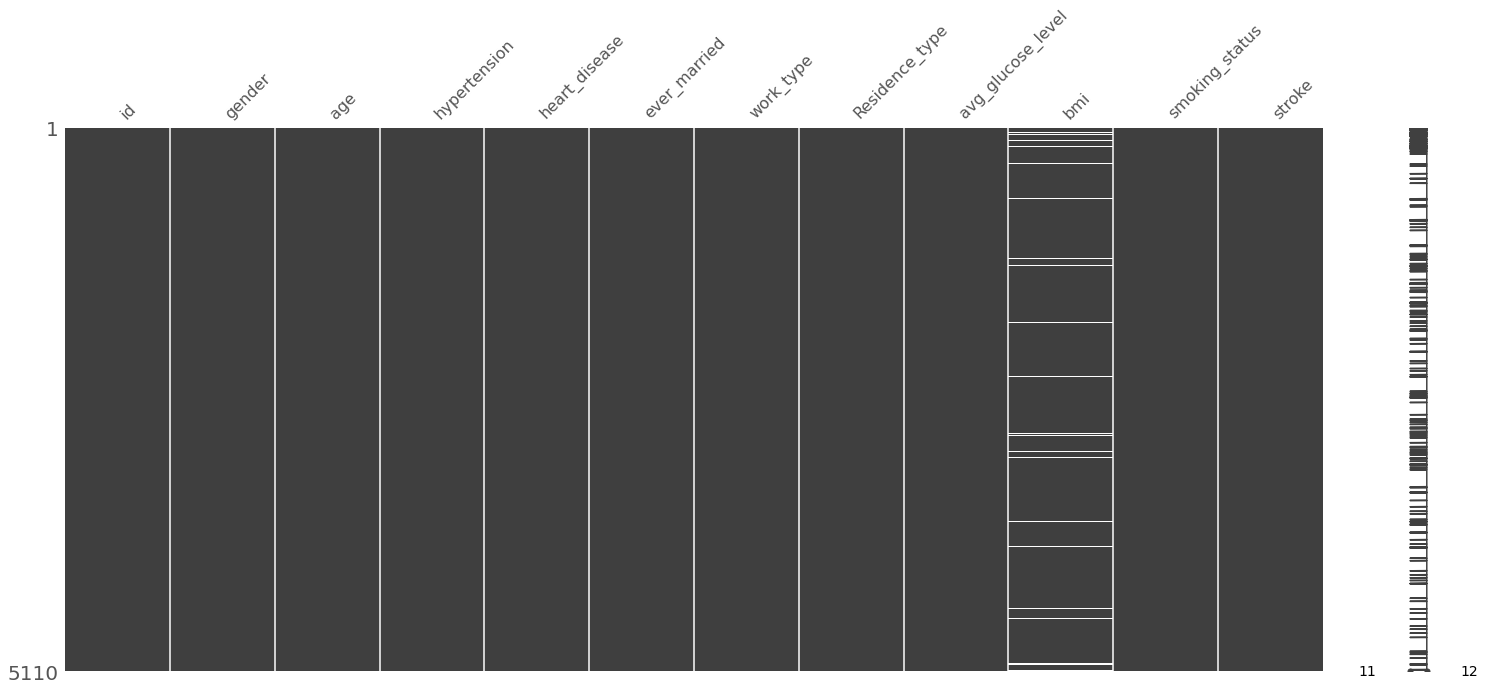

In [9]:
import missingno as msno

msno.matrix(df)

<AxesSubplot:>

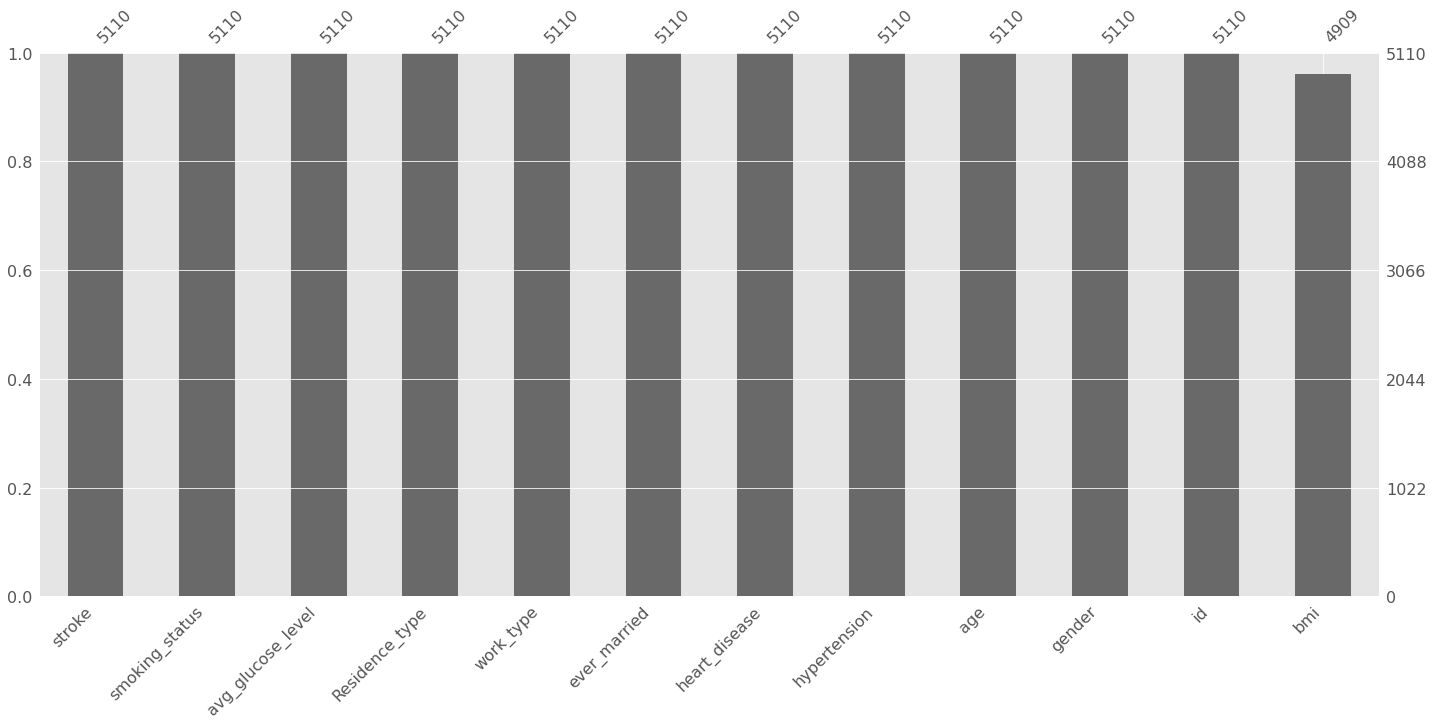

In [10]:
msno.bar(df, sort = 'descending')


**Observation:** We can thus validate our previous assumption that there are null values in bmi column. Let's try filling out those null values.



In [11]:
df['bmi'].nunique()


418

In [12]:
# handling missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

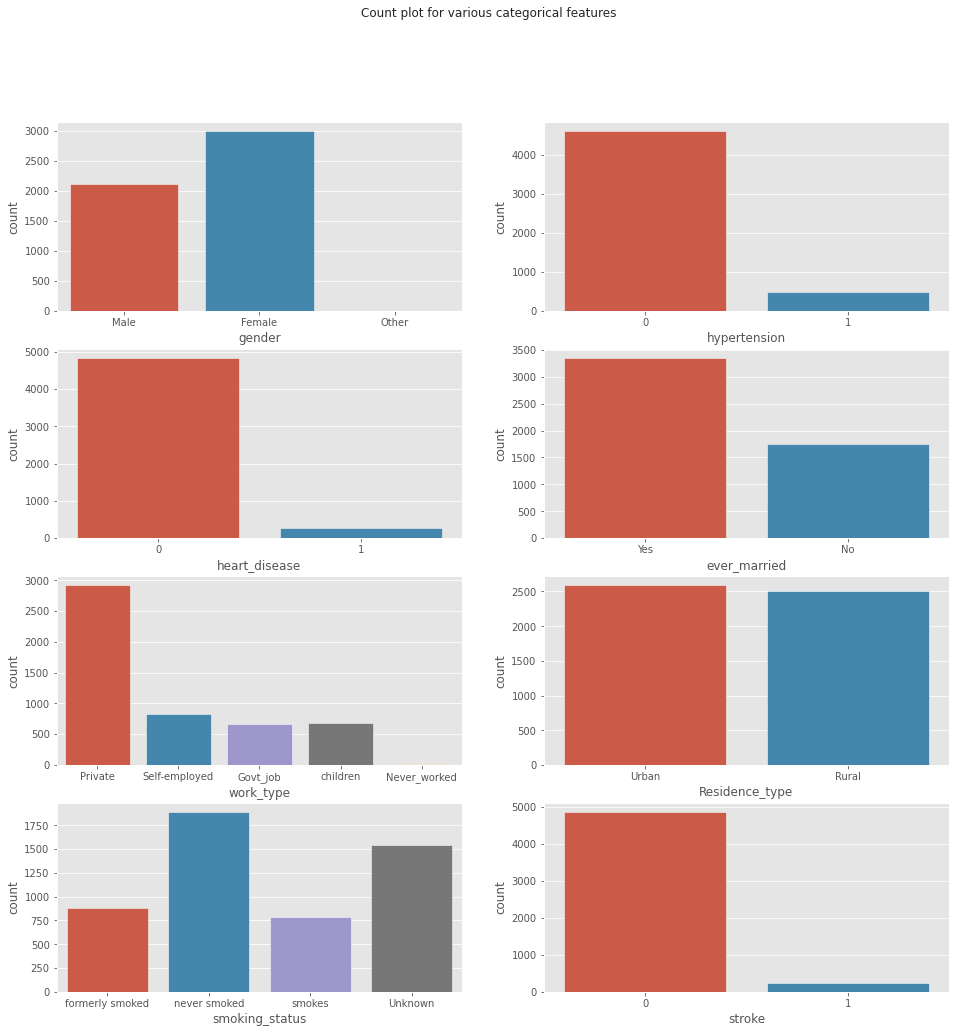

In [13]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

In [14]:
#This is to look at what all unique values have . Just trying to use python
list_col=['smoking_status','work_type','Residence_type','gender']

#What are the different types of smking status?
#What are the different work types?
#What are the residence types?
#How many models we have?

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SMOKING_STATUS :['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 
WORK_TYPE :['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 
RESIDENCE_TYPE :['Urban' 'Rural'] 
GENDER :['Male' 'Female' 'Other'] 


**Observation:**

* There are 4 different types of people on the basis of smoking category.
* People can be categorised into 5 types on the basis of type of work.
* There are only 2 residences - 'Urban' and 'Rural'
* There are 3 different gender entries.

In [15]:
fig = px.box(data_frame = df,
            x = "avg_glucose_level",
            width = 800,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

**Observation:**

avg_glucose_level has large number of outliers present in the dataset.

In [16]:
## binning of numerical variables

df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

The above section of the code has been taken from Bhuvan Chennoju's notebook https://www.kaggle.com/bhuvanchennoju/data-stroytelling-auc-focus-on-strokes

<AxesSubplot:xlabel='stroke', ylabel='count'>

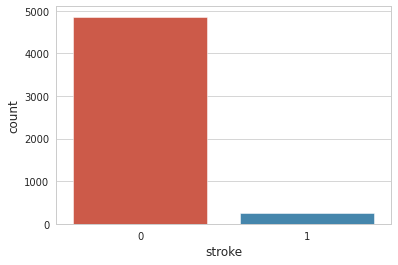

In [17]:
sns.countplot(x='stroke', data=df)

**Observation:**

* The number of people have heart stroke is actually negligible as compared to the ones not having it.
* The data is higly unbalanced.
* So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.

     |████████████████████████████████| 526 kB 1.3 MB/s 


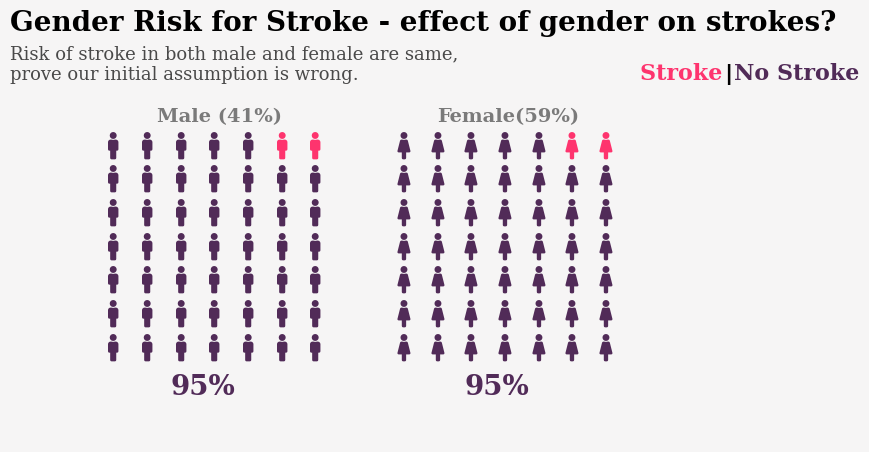

In [18]:
!pip install pywaffle
from pywaffle import Waffle

stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()

female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))


female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : ['#512b58','#fe346e'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                               'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : ['#512b58','#fe346e'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)
#fig.text ('asdfasdfasd0', {'font':'Serif', 'size':35, 'color':'black'} )


fig.text(0., 0.8, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.73, 'Risk of stroke in both male and female are same,\nprove our initial assumption is wrong. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

**Observation:**

* It is interesting to note that although the number of males and females are different in the dataset, but, both of them are at equal risk to heart stroke.
* Hence proving that our assumption that males are more susciptible to stroke due to work load, as wrong.
* Please note that the above figure has been taken from Bhuvan's notebook. https://www.kaggle.com/bhuvanchennoju/data-stroytelling-auc-focus-on-strokes

In [19]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
cont_cols = ["age","avg_glucose_level","bmi"]

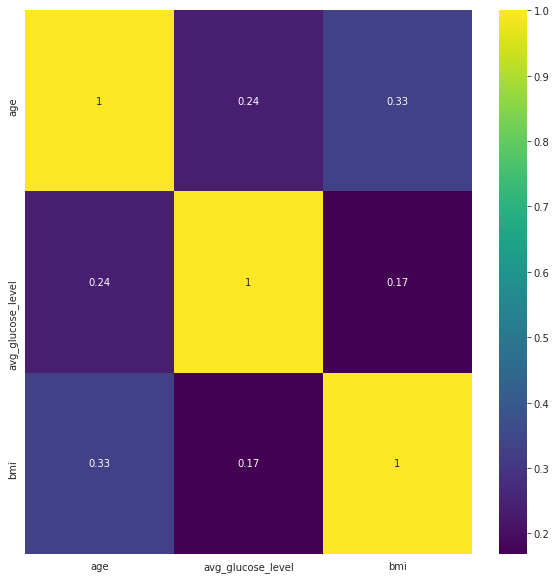

In [20]:
cr = df[cont_cols].corr()
plt.figure(figsize = (10,10))
sns.heatmap(cr,cmap="viridis", annot = True)
plt.show()

**Observation:** We cannot see any noteworthy correlation between the given features!

In [21]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['Red']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.show()


**Observation:**

* There are a lot of outliers in bmi
* The outliers make the distribution curve highly skewed towards right
* Either the outliers can be removed or the distribution curve can be made less-skewed by mapping the values with a log but both cases will lead to loss of the number of datapoints with Stroke = 1

In [22]:
df['gender'].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**Observation:** Since there is only one 'Other' category in gender, we should remove it from our data.

In [23]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
print("The shape before removing the BMI outliers : ",df.shape)
df.drop(df[df['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape before removing the BMI outliers :  (5109, 15)
The shape after removing the BMI outliers :  (4992, 15)


**Observation:** The outliers of BMI index have been removed. Let us plot the distribution to see if it is still skewed.

In [25]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['Red']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.show()

Since STROKE is highly imbalanced, there are two ways to deal with it. We can either undersample the majority class or we could oversample the minority class.

We will be using oversampling technique for this project.

The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [26]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [27]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,Obesity,Elderly,High
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,Overweight,Elderly,High
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,Obesity,Elderly,Normal
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,Obesity,Mid Adults,High
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,Ideal,Elderly,High


Now we can see that our data has been completely transformed into numerical dataset.



In [28]:
df.drop(['bmi_cat', 'age_cat', 'glucose_cat'], axis=1, inplace=True)

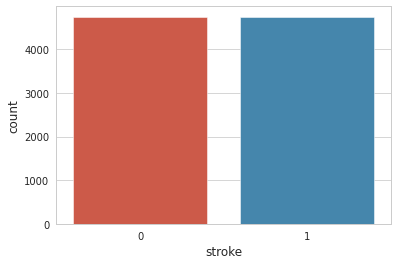

In [29]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 42)
X = df.drop(['stroke'],axis=1)
y = df[['stroke']]
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

In [30]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


**Observation:** It's quite clear that the data has been completely balanced.



In [31]:
# Joining back dataset
df = pd.concat([X,y],axis = 1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [32]:
df = df.sample(frac = 1)


In [33]:
import torch
import torch.nn as nn

In [34]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"]
cont_cols = ["age","avg_glucose_level","bmi"]
y_col = ["stroke"]

In [35]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9492 entries, 8164 to 6746
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 9492 non-null   int64   
 1   gender             9492 non-null   category
 2   age                9492 non-null   float64 
 3   hypertension       9492 non-null   category
 4   heart_disease      9492 non-null   category
 5   ever_married       9492 non-null   category
 6   work_type          9492 non-null   category
 7   Residence_type     9492 non-null   category
 8   avg_glucose_level  9492 non-null   float64 
 9   bmi                9492 non-null   float64 
 10  smoking_status     9492 non-null   category
 11  stroke             9492 non-null   int64   
dtypes: category(7), float64(3), int64(2)
memory usage: 510.8 KB


In [37]:
# stacking the categorical columns
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)
cats[:5]

array([[0, 0, 0, 1, 2, 0, 2],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 2, 0, 1],
       [0, 0, 0, 0, 2, 1, 1],
       [1, 0, 0, 0, 2, 1, 3]], dtype=int8)

In [38]:
# converting the stack into tensor
cats = torch.tensor(cats, dtype = torch.int64)
cats[:5]

tensor([[0, 0, 0, 1, 2, 0, 2],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 2, 0, 1],
        [0, 0, 0, 0, 2, 1, 1],
        [1, 0, 0, 0, 2, 1, 3]])

In [39]:
# stacking the continuous columns & converting to tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 72.3685,  81.2261,  29.4665],
        [ 68.7259, 125.9479,  29.9067],
        [ 78.3126, 213.0250,  32.3938],
        [ 17.0000,  67.8700,  24.9000],
        [ 24.0000,  84.1600,  37.5000]])

In [40]:
# converting target variable to tensor and flattening since CrossEntropyLoss expects a 1-d tensor
y = torch.tensor(df[y_col].values).flatten()
y[:5]


tensor([1, 1, 1, 0, 0])

In [41]:
print(cats.shape)
print(conts.shape)
print(y.shape)

torch.Size([9492, 7])
torch.Size([9492, 3])
torch.Size([9492])


In [42]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (2, 1), (2, 1), (2, 1), (5, 3), (2, 1), (4, 2)]

In [43]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [44]:
torch.manual_seed(42)
model = TabularModel(emb_szs, conts.shape[1], 2, [400,200,100], p=0.2)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(2, 1)
    (2): Embedding(2, 1)
    (3): Embedding(2, 1)
    (4): Embedding(5, 3)
    (5): Embedding(2, 1)
    (6): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.2, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=400, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [46]:
batch_size = 9000
test_size = 492

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [47]:
import time
start_time = time.time()

epochs = 320
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') 
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 

epoch:   1  loss: 0.77578634
epoch:  26  loss: 0.36524439
epoch:  51  loss: 0.34886229
epoch:  76  loss: 0.33569318
epoch: 101  loss: 0.32724625
epoch: 126  loss: 0.31271067
epoch: 151  loss: 0.31008607
epoch: 176  loss: 0.31217417
epoch: 201  loss: 0.29536295
epoch: 226  loss: 0.29305738
epoch: 251  loss: 0.28870794
epoch: 276  loss: 0.28413370
epoch: 301  loss: 0.27551928
epoch: 320  loss: 0.27390841

Duration: 117 seconds


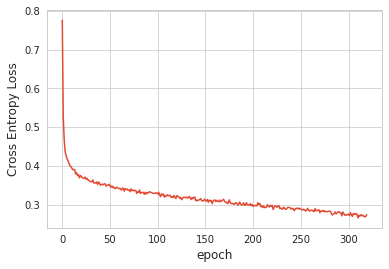

In [48]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [49]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.27116597


In [50]:
rows = 200
correct = 0
groundTruth = []
predictedValues = []
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    predictedValues.append(y_val[i].argmax().item())
    groundTruth.append(y_test[i])
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 0.1203, -1.2438])    0      0   
tensor([0.5167, 0.3993])      0      1   
tensor([ 1.6041, -1.7847])    0      0   
tensor([ 0.5780, -1.9222])    0      0   
tensor([ 1.7220, -3.4610])    0      0   
tensor([ 2.8107, -4.7344])    0      0   
tensor([ 0.4458, -1.7142])    0      0   
tensor([ 1.1706, -1.5426])    0      0   
tensor([ 4.0930, -5.4799])    0      0   
tensor([-2.0186,  0.3910])    1      1   
tensor([  8.1345, -11.4109])    0      0   
tensor([-1.3515,  0.8841])    1      1   
tensor([0.3929, 0.3597])      0      1   
tensor([ 0.2610, -0.0916])    0      0   
tensor([-0.1867,  0.1282])    1      1   
tensor([-0.1709,  0.2757])    1      1   
tensor([-2.3651,  1.8263])    1      1   
tensor([-0.3241,  0.3724])    1      1   
tensor([-1.6182,  1.4512])    1      1   
tensor([0.1695, 0.4284])      1      0   
tensor([-0.4314,  0.9597])    1      0   
tensor([-0.8537,  0.6647])    1      1   
tensor([ 0.0897, -1.0009])    0 

In [51]:
from sklearn.metrics import f1_score
print("The F1-score is :", f1_score(groundTruth, predictedValues))
print("\n")
print(confusion_matrix(groundTruth, predictedValues))
print("\n")
print(classification_report(groundTruth, predictedValues))

The F1-score is : 0.9090909090909091


[[86  9]
 [10 95]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.90        95
           1       0.91      0.90      0.91       105

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



The prediction part of this notebook has been referred from Naman Manchanda's notebook https://www.kaggle.com/namanmanchanda/stroke-eda-and-ann-prediction

And as a main helper to this kaggle notebook , a special Thanks to Aditi Mulye!
Thank you for making such a wonderful notebook! Really helped me learn a lot!